In [163]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [164]:
from fedot_ind.api.utils.path_lib import PROJECT_PATH
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_uni_classification'
path_to_results_2024 = PROJECT_PATH+'/benchmark/results/time_series_uni_clf_09022024.csv'
clf_comp = pd.read_csv(path_to_results_2024, sep=',',decimal=',', index_col=0).astype(float)
for i in os.listdir(path_to_datasets):
    try:
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report)
        new_metric = float(data[data['Unnamed: 0'] == i]['Fedot_Industrial'].values)
        old_metric = float(clf_comp.loc[i, ['Fedot_Industrial']].values)
        if new_metric > old_metric:
            print(f"New result for dataset - {i}. Old metric - {old_metric}. New metric - {new_metric}")
            clf_comp.loc[i, ['Fedot_Industrial']] = new_metric
    except Exception as e:
        print(f"{i}")

comprasion_metrics_report.csv
Fungi
InsectWingbeatSound
StarlightCurves
ToeSegmentation1
ToeSegmentation2
UMD


In [165]:
clf_comp['Fedot_Industrial_best'] = clf_comp.apply(lambda row: max(row.loc['Fedot_Industrial'],row.loc['Fedot_Industrial_finetuned']), axis=1)

In [166]:
clf_comp['Difference %'] = (-(clf_comp.iloc[:, :-4].max(axis=1) - clf_comp['Fedot_Industrial_best']) / clf_comp.iloc[:,
                                                                                                 :-4].max(axis=1)) * 100
clf_comp = clf_comp.fillna(0)
clf_comp = clf_comp[clf_comp['Fedot_Industrial_best']>0]
del clf_comp['Fedot_Industrial'],clf_comp['Fedot_Industrial_finetuned']
clf_comp

,FreshPRINCE,HC2,Hydra-MR,InceptionT,PF,RDST,RSTSF,WEASEL_D,TS-CHIEF,"HIVE-COTE v1,0",...,ProximityForest,WEASEL,S-BOSS,cBOSS,BOSS,RISE,TSF,Catch22,Fedot_Industrial_best,Difference %
Phoneme,0.345464,0.377637,0.353376,0.337025,0.312764,0.339662,0.389241,0.339135,0.370,0.371,...,0.320,0.259,0.280,0.273,0.255,0.347,0.194,0.300,0.406000,4.305691
Crop,0.770417,0.759464,0.778690,0.798512,0.755655,0.771310,0.776012,0.760952,0.762,0.768,...,0.753,0.724,0.708,0.701,0.686,0.730,0.746,0.653,0.803000,0.562057
MiddlePhalanxTW,0.558442,0.577922,0.519481,0.532468,0.538961,0.532468,0.584416,0.558442,0.573,0.584,...,0.549,0.554,0.542,0.567,0.532,0.585,0.569,0.557,0.809000,37.118644
CricketX,0.710256,0.828205,0.812821,0.848718,0.800000,0.817949,0.753846,0.807692,0.830,0.816,...,0.800,0.776,0.784,0.764,0.762,0.706,0.693,0.609,0.879000,3.567976
Ham,0.742857,0.723810,0.742857,0.723810,0.685714,0.714286,0.790476,0.790476,0.805,0.840,...,0.783,0.821,0.835,0.811,0.837,0.820,0.799,0.694,0.900000,5.263158
ArrowHead,0.628571,0.874286,0.862857,0.862857,0.874286,0.857143,0.788571,0.862857,0.881,0.876,...,0.884,0.848,0.888,0.878,0.869,0.828,0.797,0.750,0.901000,1.463964
ECG200,0.880000,0.870000,0.920000,0.910000,0.900000,0.890000,0.870000,0.890000,0.855,0.859,...,0.873,0.859,0.872,0.830,0.878,0.851,0.860,0.789,0.936000,1.739130
SmallKitchenAppliances,0.816000,0.845333,0.802667,0.778667,0.752000,0.834667,0.821333,0.757333,0.838,0.828,...,0.738,0.805,0.791,0.774,0.747,0.806,0.788,0.817,0.936000,10.725552
Herring,0.656250,0.640625,0.734375,0.703125,0.593750,0.687500,0.562500,0.656250,0.597,0.612,...,0.574,0.602,0.608,0.574,0.596,0.598,0.604,0.556,0.957000,30.314894
ACSF1,0.890000,0.930000,0.900000,0.910000,0.690000,0.900000,0.920000,0.930000,0.807,0.850,...,0.638,0.818,0.815,0.757,0.768,0.760,0.635,0.778,0.973000,4.623656


# Compute ranks

In [149]:
clear_csv = clf_comp.iloc[:, :-1]
pd.DataFrame(clear_csv.rank(axis=1, ascending=False).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
HC2,6.475000
Hydra-MR,7.691667
"HIVE-COTE v1,0",7.941667
TS-CHIEF,8.275000
RDST,8.966667
ROCKET,9.025000
WEASEL_D,9.216667
InceptionT,9.891667
Fedot_Industrial_best,9.941667
RSTSF,10.166667


Fedot.ind has mean rank 9.94 . It's the 9'th place comparing with SOTA

In [151]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)


,top-1,top-3,top-5,top-half
Fedot_Industrial_best,17.0,19.0,20.0,22
Hydra-MR,8.0,22.0,29.0,36
FreshPRINCE,7.0,11.0,15.0,23
InceptionT,6.0,15.0,24.0,32
HC2,4.0,21.0,36.0,46
RDST,3.0,9.0,23.0,33
RSTSF,3.0,12.0,20.0,28
TS-CHIEF,3.0,11.0,21.0,30
"HIVE-COTE v1,0",2.0,9.0,18.0,27
PF,2.0,5.0,12.0,16


# Rank Distribution

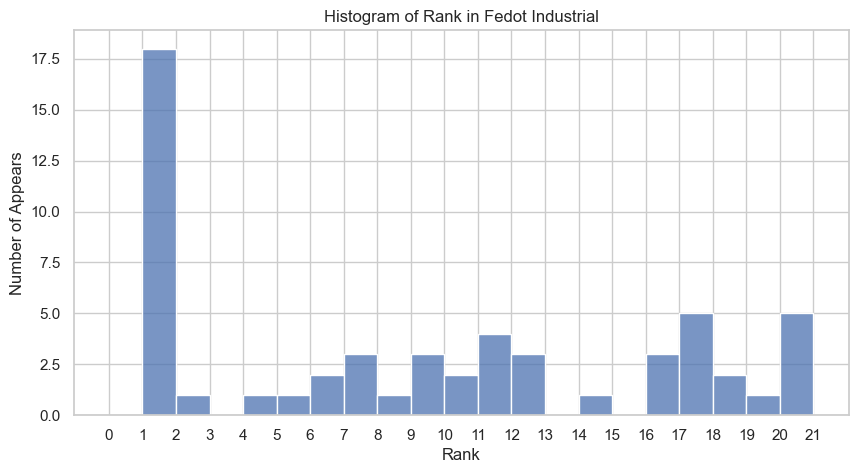

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial_best'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

Fedot ind tends to make accurate predictions either poor predictions. 

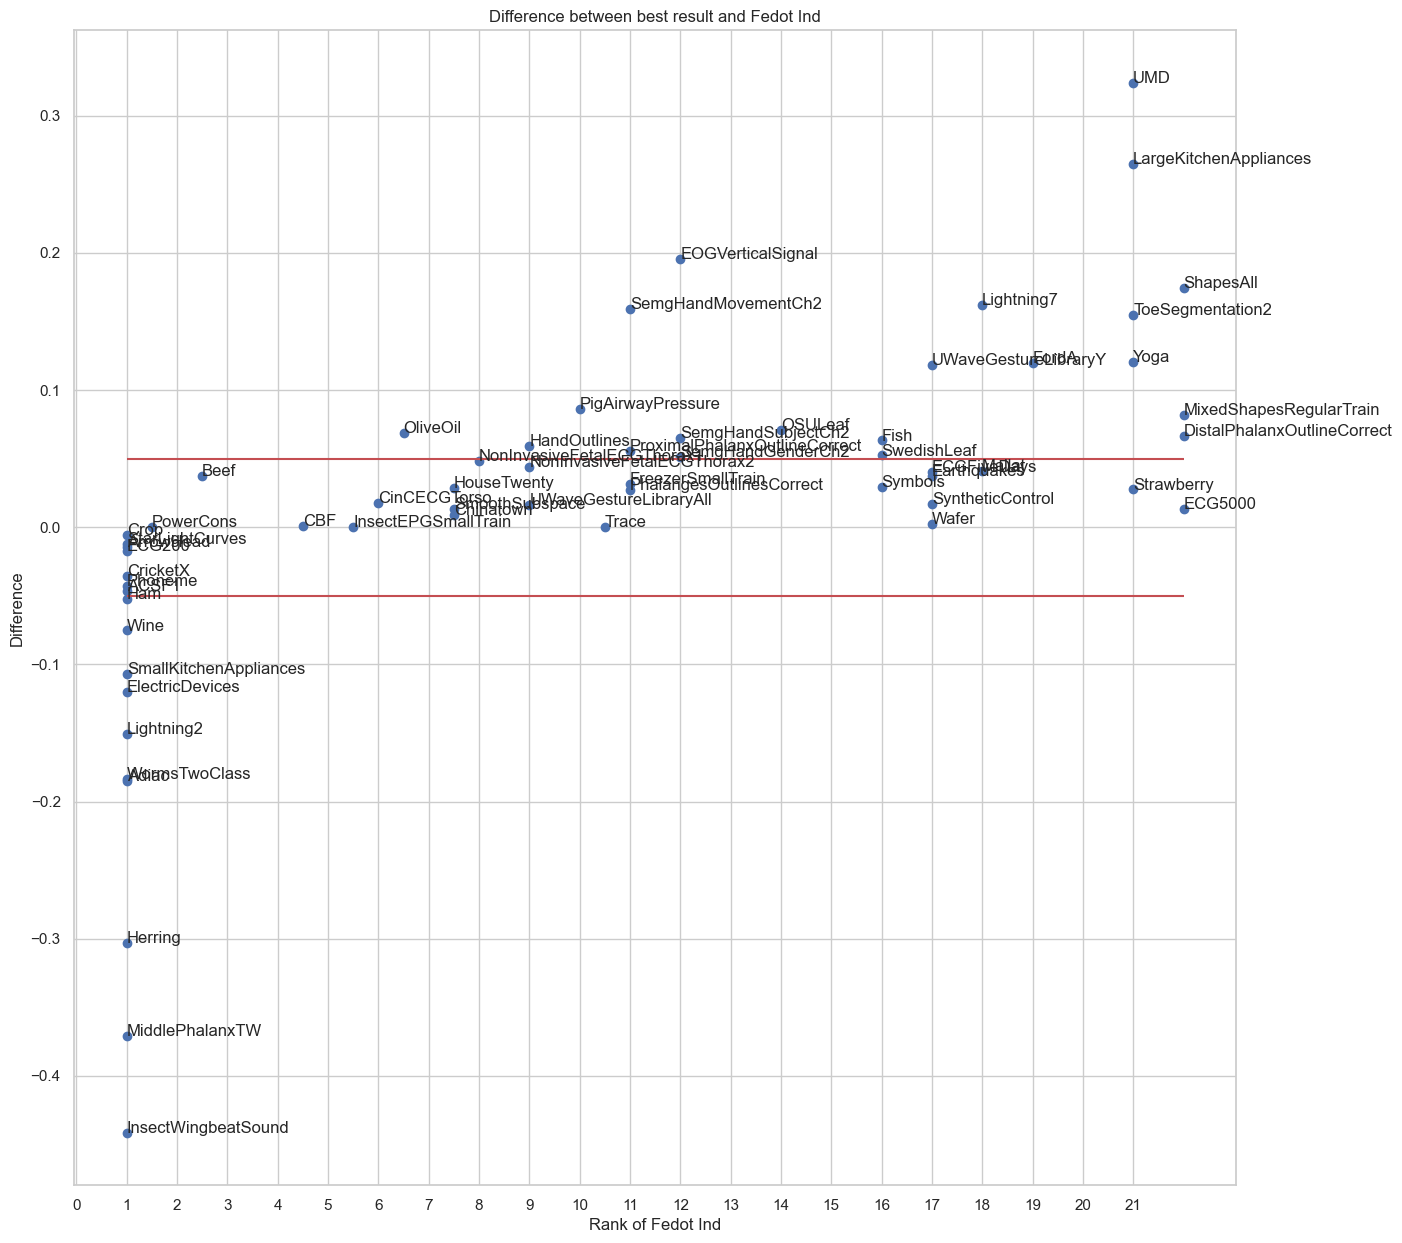

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
differences_from_first_place = (clear_csv.iloc[:, :-2].max(axis=1) - clear_csv['Fedot_Industrial_best']) / clear_csv.iloc[:, :-2].max(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.xticks(np.arange(0, clear_csv.shape[1], 1))
plt.yticks(np.arange(-0.4, 1, 0.1))
# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial_best'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial_best'])):
    plt.annotate(clf_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial_best'].values[i], differences_from_first_place.values[i]))
plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Good solutions

In [161]:
good_idx = clf_comp.sort_values(by='Difference %', ascending=False).iloc[:10, :].index.values
good_idx

array(['InsectWingbeatSound', 'MiddlePhalanxTW', 'Herring', 'Adiac',
       'WormsTwoClass', 'Lightning2', 'ElectricDevices',
       'SmallKitchenAppliances', 'Wine', 'Ham'], dtype=object)

InsectWingbeatSound
For InsectWingbeatSound no results!
MiddlePhalanxTW
For MiddlePhalanxTW no results!
Herring


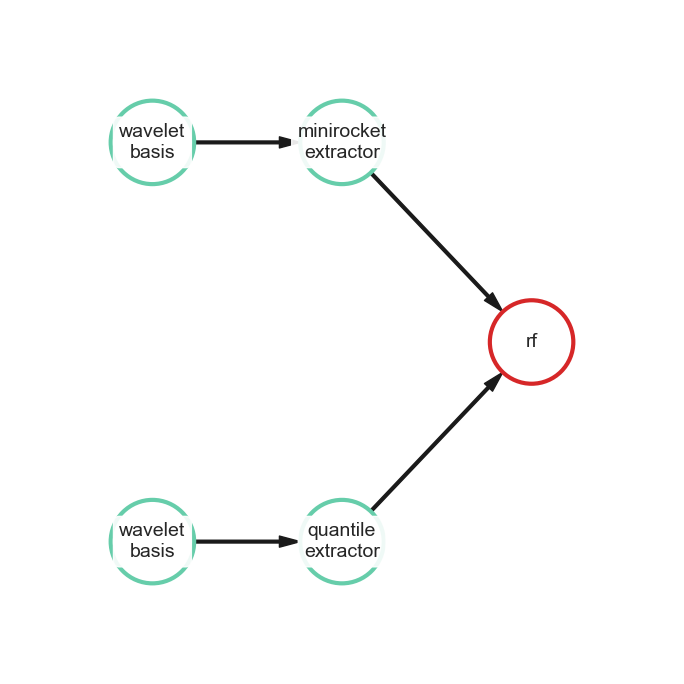

Adiac
For Adiac no results!
WormsTwoClass
For WormsTwoClass no results!
Lightning2


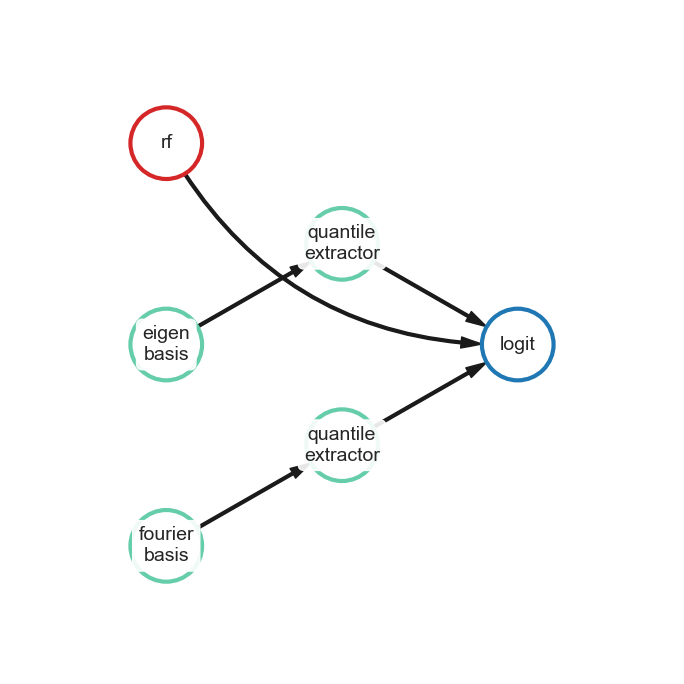

ElectricDevices


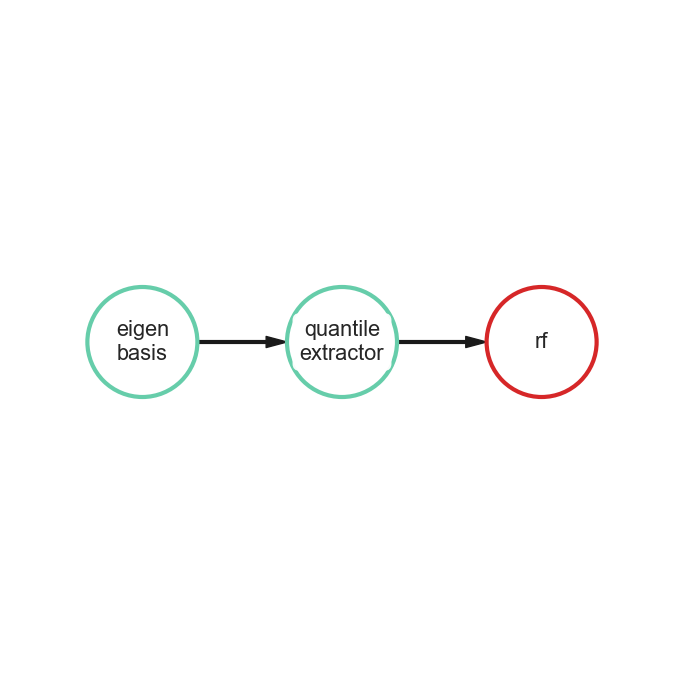

SmallKitchenAppliances


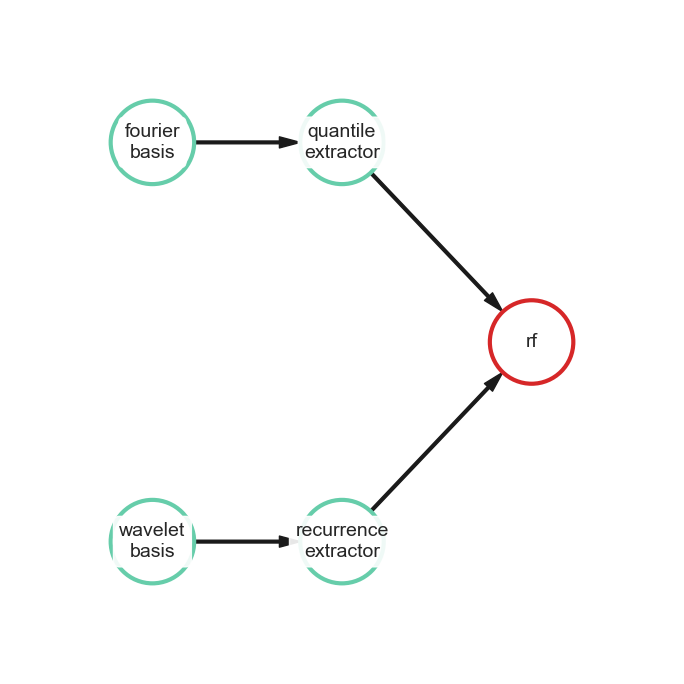

Wine
For Wine no results!
Ham


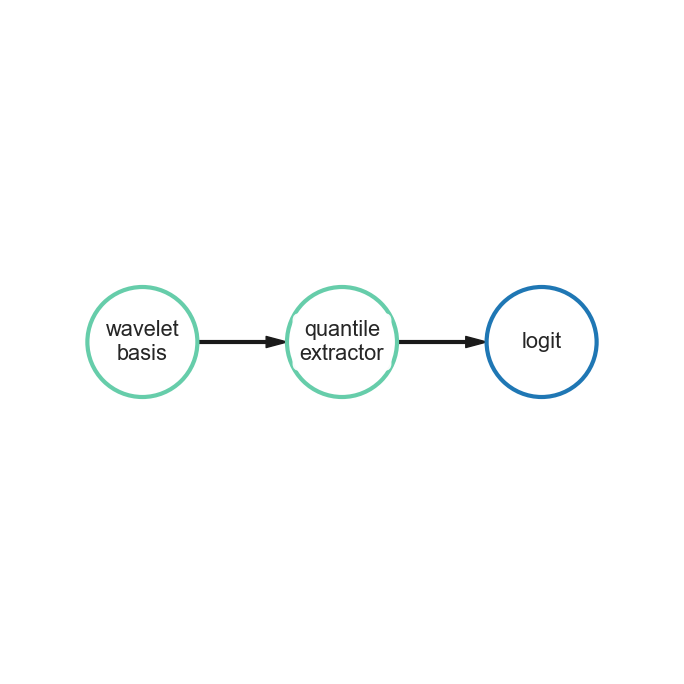

In [162]:
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in good_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

# Bad solutions

In [159]:
bad_idx = clf_comp.sort_values(by='Difference %', ascending=True).iloc[:10, :].index.values
bad_idx

array(['UMD', 'LargeKitchenAppliances', 'EOGVerticalSignal', 'ShapesAll',
       'Lightning7', 'SemgHandMovementCh2', 'ToeSegmentation2', 'Yoga',
       'FordA', 'UWaveGestureLibraryY'], dtype=object)

UMD
For UMD no results!
LargeKitchenAppliances


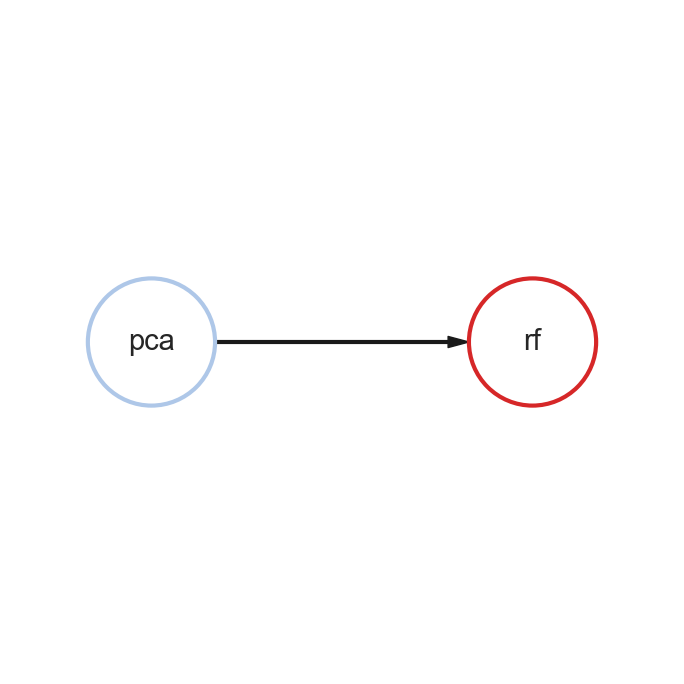

EOGVerticalSignal
For EOGVerticalSignal no results!
ShapesAll
For ShapesAll no results!
Lightning7
For Lightning7 no results!
SemgHandMovementCh2


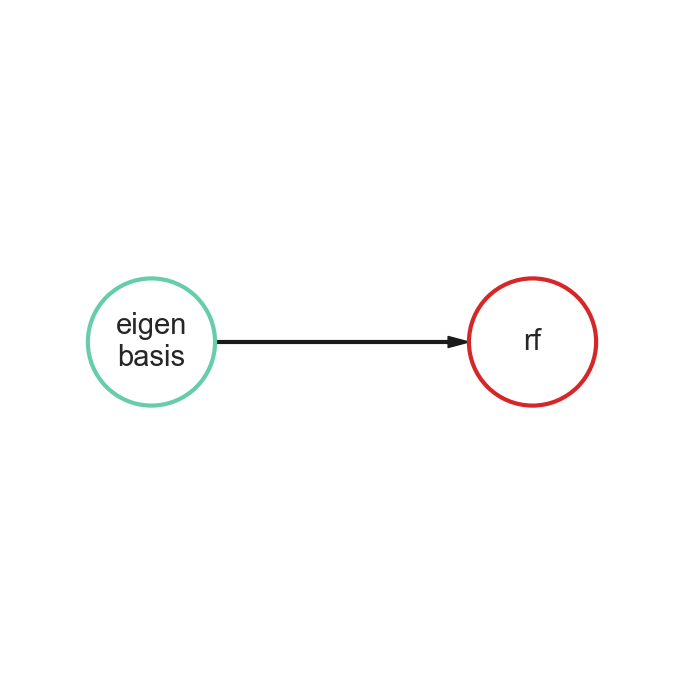

ToeSegmentation2
For ToeSegmentation2 no results!
Yoga


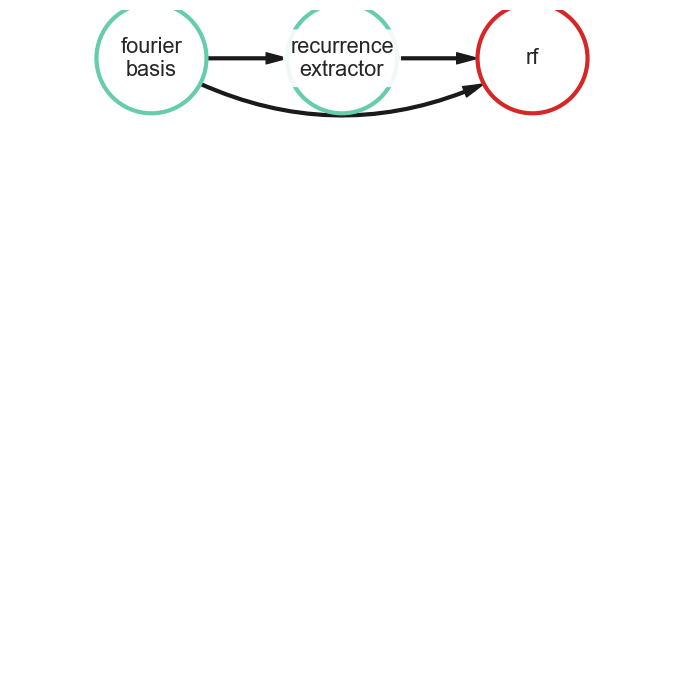

FordA


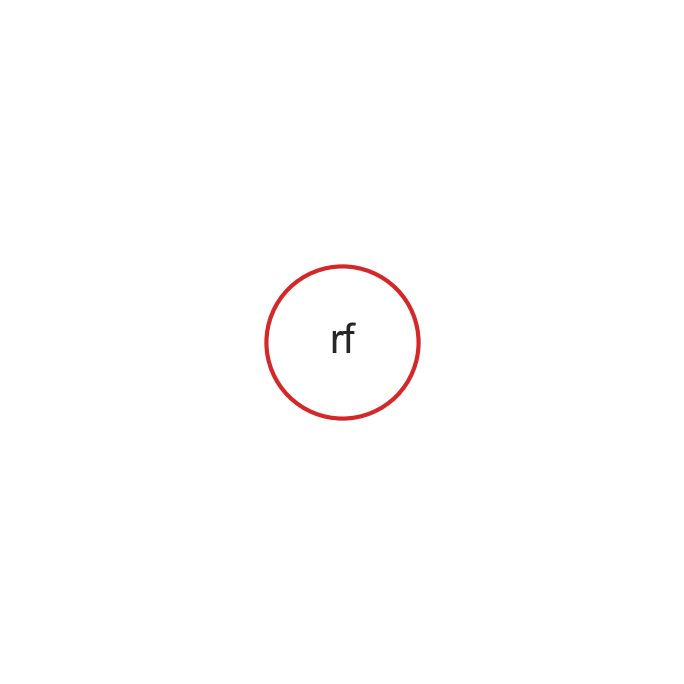

UWaveGestureLibraryY
For UWaveGestureLibraryY no results!


In [160]:
from fedot.core.pipelines.pipeline import Pipeline
for idx in bad_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')